# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [91]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [12]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    df = pd.DataFrame(data=iris_data.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
    df["target"] = iris_data["target"]
    df['class'] = df["target"].apply(lambda x: iris_data.target_names[x])
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
15,5.7,4.4,1.5,0.4,0,setosa
10,5.4,3.7,1.5,0.2,0,setosa
148,6.2,3.4,5.4,2.3,2,virginica
20,5.4,3.4,1.7,0.2,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
126,6.2,2.8,4.8,1.8,2,virginica
88,5.6,3.0,4.1,1.3,1,versicolor
0,5.1,3.5,1.4,0.2,0,setosa
85,6.0,3.4,4.5,1.6,1,versicolor
115,6.4,3.2,5.3,2.3,2,virginica


In [ ]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [7]:

#From our data we will only get variable columns as np.array
x = 0
x = df_iris.iloc[:,:4]
x = np.array(x)

In [5]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [14]:

#y = df_iris_sample.iloc[:,:4]
#y = np.array(y)
mergings = linkage(x, method='complete')

In [15]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

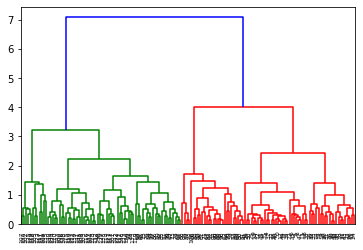

In [38]:
dn = 0
dn = dendrogram(mergings, leaf_rotation = 90, leaf_font_size= 6 )


In [ ]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [81]:
from sklearn.cluster import KMeans

df = pd.read_csv('../datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('../datasets/ch1ex2.csv')
new_points = new_df.values

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [56]:
model = KMeans(n_clusters = 3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [64]:
model = model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [71]:
labels = model.predict(points)
points[0]

array([ 0.06544649, -0.76866376])

In [65]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [114]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        elif labels[i] == 2:
            data_2.append(points[i])
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)


(111, 2)
(95, 2)
(94, 2)


In [82]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

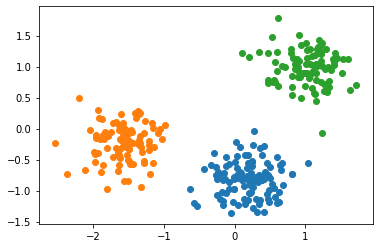

In [101]:
# plotting the data 
#plt.plot(data_0[0])
#plt.plot(data_1[0])
#plt.plot(data_2[0])

plt.scatter(data_0[:,0], data_0[:,1])
plt.scatter(data_1[:,0], data_1[:,1])
plt.scatter(data_2[:,0], data_2[:,1])

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [103]:
new_labels = model.predict(new_points)

In [104]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [107]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

new_0, new_1, new_2 = separate_labels(new_labels,new_points)


In [108]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

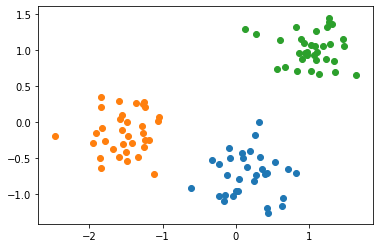

In [111]:
#plot the new labels
plt.scatter(new_0[:,0], new_0[:,1])
plt.scatter(new_1[:,0], new_1[:,1])
plt.scatter(new_2[:,0], new_2[:,1])


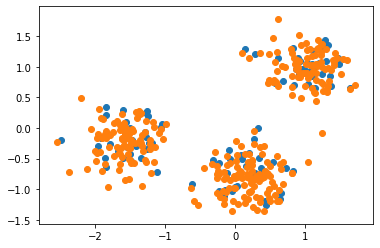

In [113]:
plt.scatter(new_points[:,0], new_points[:,1])
plt.scatter(points[:,0], points[:,1])